### 오라클 DB연동

In [1]:
# conda install -c conda-forge cx_Oracle : 오라클 연동 모듈 설치

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc
import seaborn as sns
import platform

In [3]:
# seaborn 설정 리셋
sns.reset_defaults()

# 폰트설정
if platform.system() == 'Windows' :
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else :
    print('Check your OS System')
    
# 그래프에 마이너스 표시
matplotlib.rcParams['axes.unicode_minus'] = False

In [9]:
import cx_Oracle as ora
import pandas as pd

In [10]:
# 데이터소스 네임 객체생성(접속주소, 포트번호, 서비스명)
dsn = ora.makedsn('localhost', 1521, service_name = 'orcl')
dsn

'(DESCRIPTION=(ADDRESS=(PROTOCOL=TCP)(HOST=localhost)(PORT=1521))(CONNECT_DATA=(SERVICE_NAME=orcl)))'

In [11]:
# DB연결 객체 생성
conn = ora.connect(user = 'busan_06', password = 'dbdb', dsn = dsn, encoding = 'utf-8')
conn

<cx_Oracle.Connection to busan_06@(DESCRIPTION=(ADDRESS=(PROTOCOL=TCP)(HOST=localhost)(PORT=1521))(CONNECT_DATA=(SERVICE_NAME=orcl)))>

In [12]:
# 커서 생성
cur = conn.cursor()
cur

<cx_Oracle.Cursor on <cx_Oracle.Connection to busan_06@(DESCRIPTION=(ADDRESS=(PROTOCOL=TCP)(HOST=localhost)(PORT=1521))(CONNECT_DATA=(SERVICE_NAME=orcl)))>>

In [13]:
sql = """
SELECT Q1
  FROM survey_employer """

sql

'\nSELECT Q1\n  FROM survey_employer '

In [14]:
cur.execute(sql)

<cx_Oracle.Cursor on <cx_Oracle.Connection to busan_06@(DESCRIPTION=(ADDRESS=(PROTOCOL=TCP)(HOST=localhost)(PORT=1521))(CONNECT_DATA=(SERVICE_NAME=orcl)))>>

In [15]:
row = cur.fetchall()

In [16]:
row[0]

('2',)

In [17]:
colname = cur.description
colname

[('Q1', <cx_Oracle.DbType DB_TYPE_VARCHAR>, 20, 20, None, None, 0)]

In [18]:
cur.close()
conn.close()

In [19]:
colname

[('Q1', <cx_Oracle.DbType DB_TYPE_VARCHAR>, 20, 20, None, None, 0)]

In [20]:
# 컬럼 뽑아오기
col = []

for i in range(len(colname)):
    col.append(colname[i][0])
    
col

['Q1']

In [21]:
row

[('2',)]

In [23]:
df = pd.DataFrame(row,columns=col)

In [73]:
result = ['2','1','3','2','5','4','5','2','5','4','5']

In [74]:
df = pd.DataFrame(result,columns=col)

In [75]:
df

,Q1
0,2
1,1
2,3
3,2
4,5
5,4
6,5
7,2
8,5
9,4


In [76]:
df = df.astype(int)

In [77]:
df

,Q1
0,2
1,1
2,3
3,2
4,5
5,4
6,5
7,2
8,5
9,4


In [78]:
final = pd.DataFrame(columns=['만족','불만족','보통'])

In [79]:
final['불만족'] = [len(df[df['Q1']<=2])]
final['만족'] = [len(df[df['Q1']>=4])]
final['보통'] = [len(df[df['Q1']==3])]

In [80]:
final = final.T.reset_index()

In [81]:
final

,index,0
0,만족,6
1,불만족,4
2,보통,1


In [82]:
xlist = np.arange(0,(final[0].max() + 20),5)

xlist

array([ 0,  5, 10, 15, 20, 25])

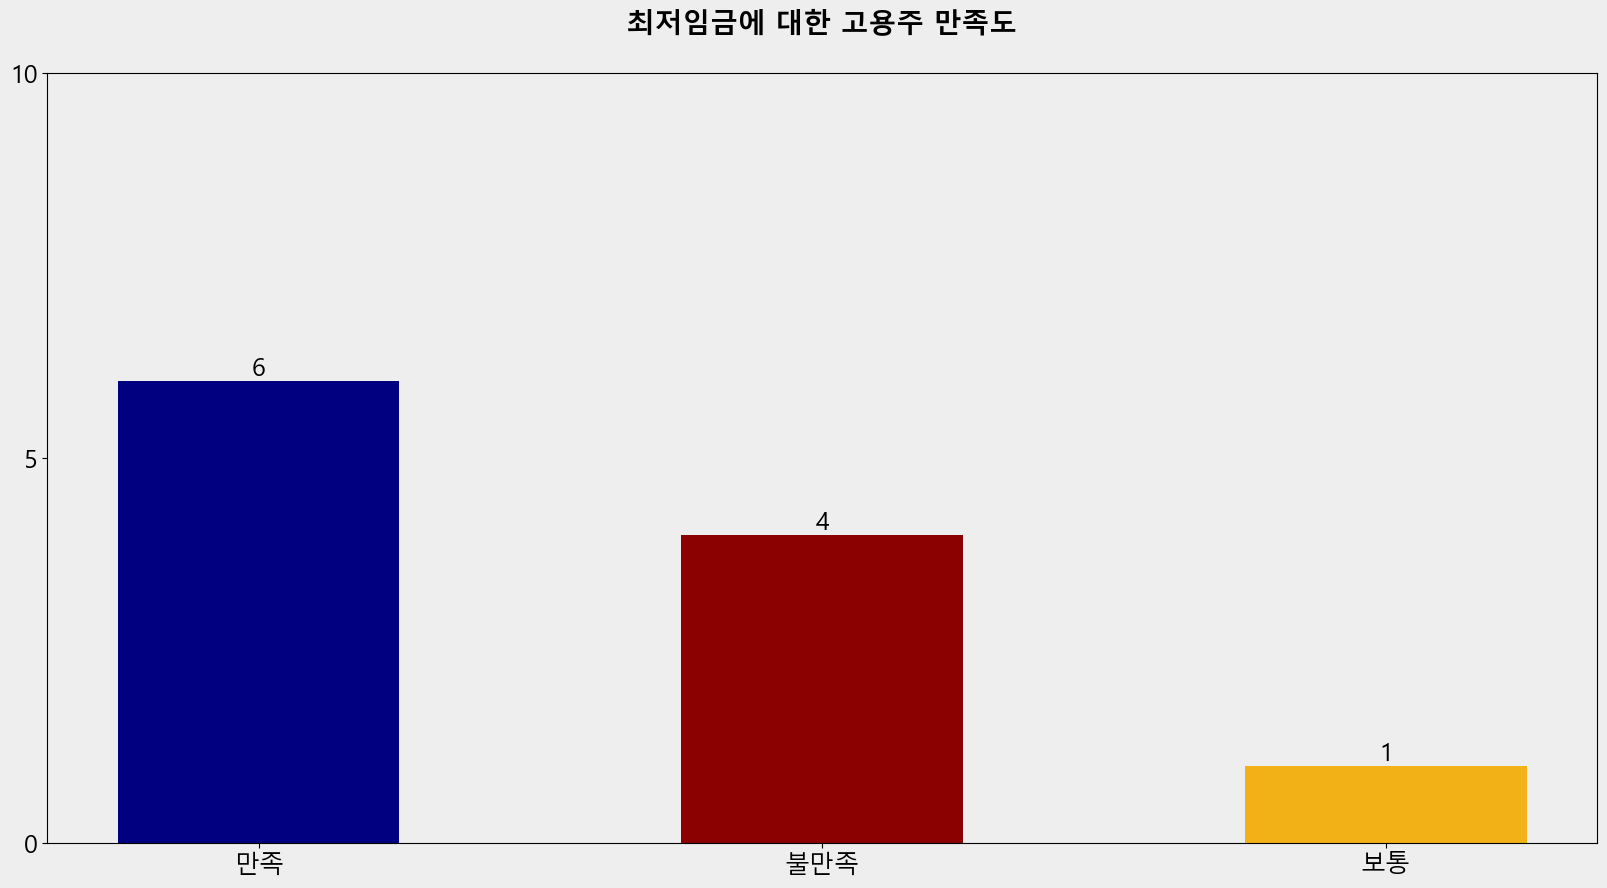

In [93]:
fig = plt.figure(figsize=(20,10))

ylist = np.arange(0,(final[0].max() + 5),5)

plt.title('최저임금에 대한 고용주 만족도',fontsize = 20,loc='center', pad=30, fontweight="bold")

fig.set_facecolor('#EEEEEE')
plt.gca().set_facecolor('#EEEEEE')
plt.rc('font', family = 'Malgun Gothic', size = 18)

plt.bar(final['index'],final[0],width=0.5, color =['navy','darkred','#F2B117'])

plt.yticks(ylist)

for i, v in enumerate(final['index']):
    plt.text(v, final[0][i], final[0][i],
             fontsize = 18,
             color='black',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)


plt.show()